# Example Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
%load_ext autoreload
%autoreload 2
plt.style.use('bmh')

In [2]:
os.chdir('../')

In [11]:
from portfolio import Portfolio
import estimation as est
import optimization as opt
import plotting
import metrics

## 1. Loading Data and Setup
- We first load the data using the `Portfolio` class and it's associated method `get_prices`. The analysis is restricted by a period required to be set by `set_period`. 

In [4]:
securities_big = ['SPY', 'BND', 'GLD', '^RUT']
pf1 = Portfolio(securities_big)
pf1.set_period(('2017-01-01', '2021-05-28'))
pf1.get_prices('daily')

[*********************100%***********************]  4 of 4 completed


In [5]:
pf1.set_benchmark('SPY')
pf1.set_discount('^TNX')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


- Then we set the constraints using `set_constraints` and conduct a historical backtest. This will store backtest results in the `Portfolio` class based on the frequency of the rebalance (in trading days), it's estimation period (in trading days) and the model selected in the `models: list`.

In [6]:
pf1.set_constraints(None, True)
pf1.historical_backtest(models=['EW', 'GMV', 'RP', 'MDR'], frequency=22, estimation_period = 252)

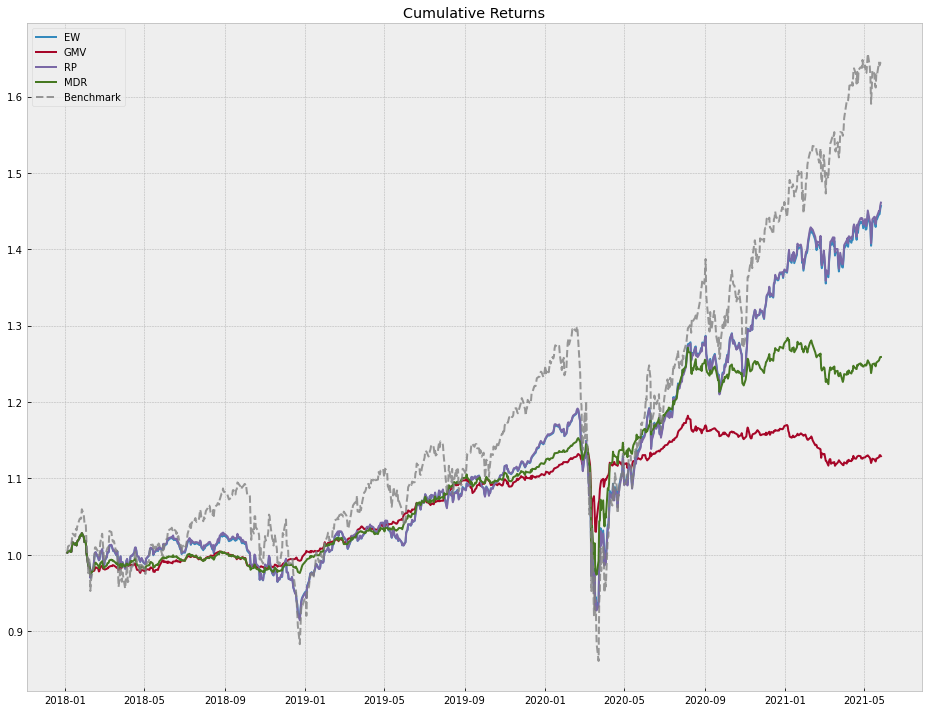

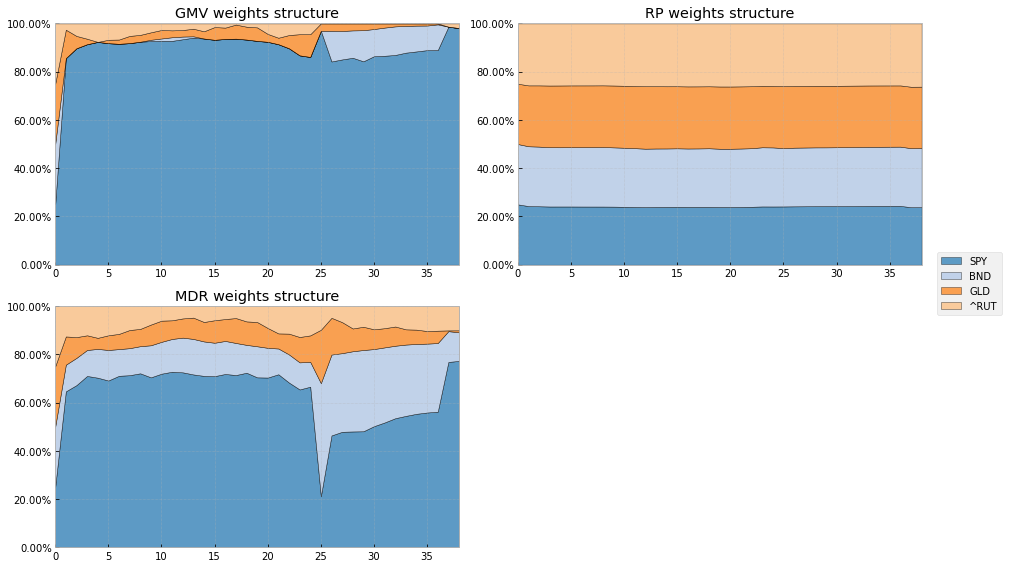

In [7]:
pf1.get_backtest_report(num_rows = 2)

In [90]:
r = pf1.backtest['EW']['returns'].flatten()
r_b = pf1.benchmark[252:]

In [ ]:
testdf = pd.DataFrame(pf1.backtest['EW']['returns'].flatten(), index = pf1.dates[252:])
testdfmon = testdf.resample('M').ffill()

In [18]:
np.mean(test)*252

0.11971781600825662

In [30]:
#cagr
(np.prod((1+test))) ** (252/test.shape[0]) 

1.1172591103170209

In [ ]:
testdfmon

In [35]:
np.sqrt(252*(np.sum(test - np.mean(test)**2)/(test.shape[0]-1)))

0.34612289693165743

In [81]:
t = r.shape[0]

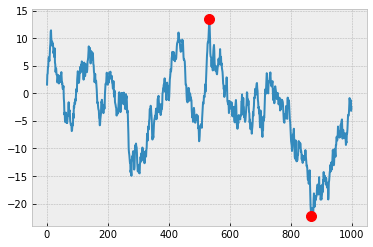

In [130]:
n = 1000
xs = np.random.randn(n).cumsum()
i = np.argmax((np.maximum.accumulate(xs) - xs) / np.maximum.accumulate(xs)) # end of the period
j = np.argmax(xs[:i]) # start of period

plt.plot(xs)
plt.plot([i, j], [xs[i], xs[j]], 'o', color='Red', markersize=10)

In [145]:
metrics.max_drawdown_duration(r)

21

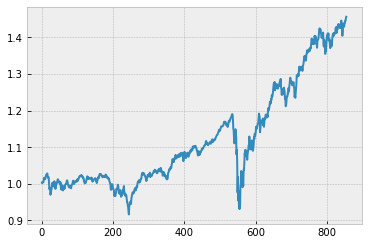

In [134]:
plt.plot(np.cumprod(1+r))

In [144]:
index = 1000 * np.cumprod(1 + r)
hwm = np.maximum.accumulate(index)
dd = (index - hwm) / hwm
end = np.argmin(dd)
start = np.argmax(index[:end])
end-start

21